# PREPARATION DES DONNEES : NPY to PNG de TAILLE 512,512

In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
import imageio
from PIL import Image
import imutils

2022-03-29 00:40:19.722757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 00:40:19.722810: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
TAILLE_X = 512
TAILLE_Y = 512

### Preparation des masques

In [3]:
#masque axiale
Taille = []

for i in range(136):
    num = str(i)
    if (i<100):
        num = '0'+num
    if(i<10):
        num = '0'+num
    #from npy to png    
    array = np.load('Segmented/ax_'+num+'_mask.npy')  
    data = Image.fromarray((array* 255).astype('uint8'), mode = 'L')
    data.save('mask/ax_'+num+'_mask.png')
    
    #Resize
    im = Image.open('mask/ax_'+num+'_mask.png')
    im = im.resize((TAILLE_X, TAILLE_Y), Image.NEAREST)
    im.save('mask/ax_'+num+'_mask.png')    
    Taille += [im.size]
    


In [30]:
#Masque corronales
Taille = []

for i in range(81):
    num = str(i)
    if (i<100):
        num = '0'+num
    if(i<10):
        num = '0'+num
    


    array = np.load('../Segmented/cor_'+num+'_mask.npy')
    data = Image.fromarray((array* 255).astype('uint8'), mode = 'L') 
    data.save('mask/cor_'+num+'_mask.png')
    
    #Resize
    #im = Image.open('mask/cor_'+num+'_mask.png')
    #im = im.resize((TAILLE_X, TAILLE_Y), Image.NEAREST)
    #im.save('mask/cor_'+num+'_mask.png')    
    #Taille += [im.size]

In [32]:
#Masque Sagital
Taille = []
for i in range(193):
    num = str(i)
    if (i<100):
        num = '0'+num
    if(i<10):
        num = '0'+num

    array = np.load('../Segmented/sag_'+num+'_mask.npy')
    data = Image.fromarray((array* 255).astype('uint8'), mode = 'L')
    data.save('mask/sag_'+num+'_mask.png')
    
    #Resize
    #im = Image.open('mask/sag_'+num+'_mask.png')
    #im = im.resize((TAILLE_X, TAILLE_Y), Image.NEAREST)
    #im.save('mask/sag_'+num+'_mask.png')    
    #Taille += [im.size]

### Preparation des coupes 

Les coupes auront (512,512,3) ici

In [13]:
Taille = []

#Creation de png pour coupe axiale
for i in range(136):
    num = str(i)
    if (i<100):
        num = '0'+num
    if(i<10):
        num = '0'+num

    array = np.load('Segmented/ax_'+num+'.npy')
    data = Image.fromarray((array* 255).astype('uint8'), mode = 'L')
    data.save('images/ax_'+num+'.png')
    
    #Resize
    im = Image.open('images/ax_'+num+'.png')
    im = im.resize((TAILLE_X, TAILLE_Y), Image.NEAREST)
    im.save('images/ax_'+num+'.png')    
    Taille += [im.size]


In [18]:
Taille = []

#Creation de png pour coupes corronales
for i in range(81):
    num = str(i)
    if (i<100):
        num = '0'+num
    if(i<10):
        num = '0'+num

    array = np.load('Segmented/cor_'+num+'.npy')
    data = Image.fromarray((array* 255).astype('uint8'), mode = 'L')
    data.save('images/cor_'+num+'.png')
    
    #Resize
    im = Image.open('images/sag_'+num+'.png')
    im = im.resize((TAILLE_X, TAILLE_Y), Image.NEAREST)
    im.save('images/cor_'+num+'.png')    
    Taille += [im.size]



In [19]:
Taille = []

#Coupe Sag
for i in range(193):
    num = str(i)
    if (i<100):
        num = '0'+num
    if(i<10):
        num = '0'+num

    array = np.load('Segmented/sag_'+num+'.npy')
    data = Image.fromarray((array* 255).astype('uint8'), mode = 'L')
    data.save('images/sag_'+num+'.png')
    
    #Resize
    im = Image.open('images/sag_'+num+'.png')
    im = im.resize((TAILLE_X, TAILLE_Y), Image.NEAREST)
    im.save('images/sag_'+num+'.png')    
    Taille += [im.size]



# Prepare paths of input images and target segmentation masks

In [20]:
import os

input_dir = "images/"
target_dir = "mask/"
img_size = (TAILLE_X, TAILLE_Y)  


input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 410
images/ax_000.png | mask/ax_000_mask.png
images/ax_001.png | mask/ax_001_mask.png
images/ax_002.png | mask/ax_002_mask.png
images/ax_003.png | mask/ax_003_mask.png
images/ax_004.png | mask/ax_004_mask.png
images/ax_005.png | mask/ax_005_mask.png
images/ax_006.png | mask/ax_006_mask.png
images/ax_007.png | mask/ax_007_mask.png
images/ax_008.png | mask/ax_008_mask.png
images/ax_009.png | mask/ax_009_mask.png


## What does one input image and corresponding segmentation mask look like?

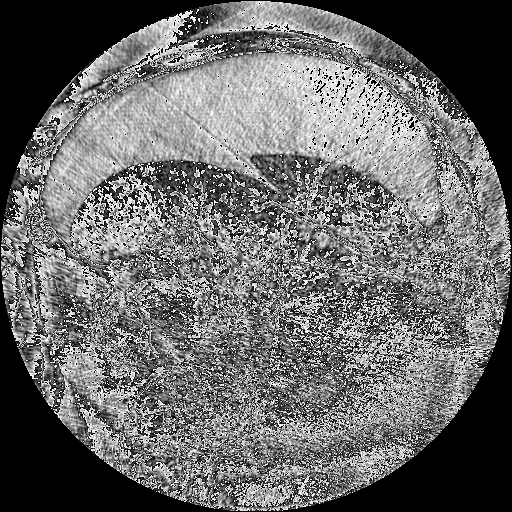

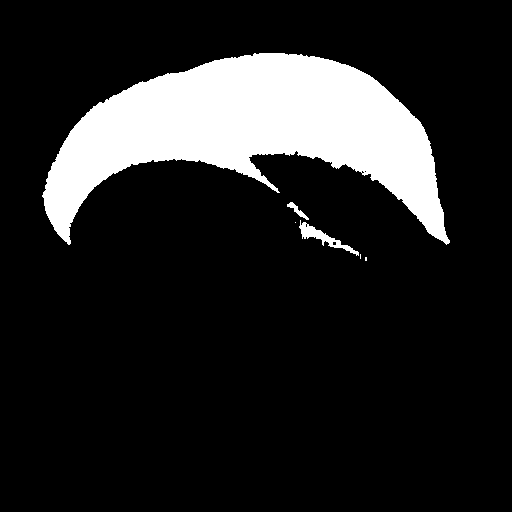

In [21]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[2]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[2]))
display(img)

## Train et Validation Split

In [22]:
import random

# Split our img paths into a training and a validation set
val_samples = 100  #train =300, val = 100
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]

val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]


# 1er Modele

## Prepare `Sequence` class to load & vectorize batches of data

In [23]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y


In [24]:
num_classes = 1
batch_size = 2

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

## Prepare U-Net Xception-style model

In [25]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

2022-03-24 20:29:42.586913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/valentin/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-24 20:29:42.586992: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-24 20:29:42.587029: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (valentin15ARE05): /proc/driver/nvidia/version does not exist
2022-03-24 20:29:42.587908: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

 max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 256)  0          ['batch_normalization_6[0][0]']  
                                                                                                  
 conv2d_3 (Conv2D)              (None, 32, 32, 256)  33024       ['add_1[0][0]']                  
                                                                                                  
 add_2 (Add)                    (None, 32, 32, 256)  0           ['max_pooling2d_2[0][0]',        
                                                                  'conv2d_3[0][0]']               
                                                                                                  
 activation_7 (Activation)      (None, 32, 32, 256)  0           ['add_2[0][0]']                  
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 32, 32, 256)  590080     ['activation_7[0][0]']           
 ose)     

                                                                                                  
 conv2d_6 (Conv2D)              (None, 256, 256, 64  8256        ['up_sampling2d_5[0][0]']        
                                )                                                                 
                                                                                                  
 add_5 (Add)                    (None, 256, 256, 64  0           ['up_sampling2d_4[0][0]',        
                                )                                 'conv2d_6[0][0]']               
                                                                                                  
 activation_13 (Activation)     (None, 256, 256, 64  0           ['add_5[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_tr

## Train the model

In [28]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              loss="binary_crossentropy", metrics=["acc"])

callbacks = [
    
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 1
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

155/155 [==============================] - 280s 2s/step - loss: -648448055443456.0000 - acc: 0.0000e+00 - val_loss: -656656945905664.0000 - val_acc: 0.0000e+00


## Visualize predictions

In [30]:
# Generate predictions for all images in the validation set

val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)



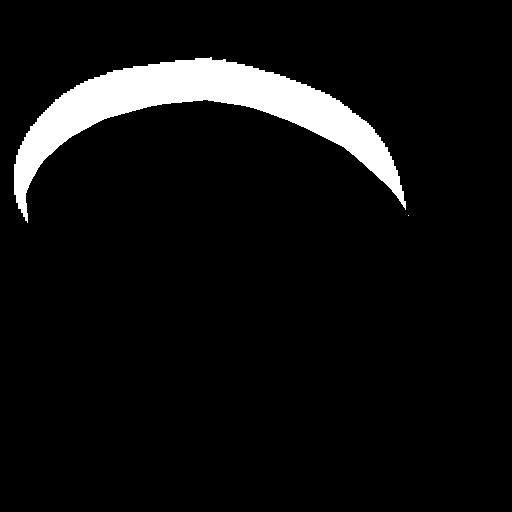

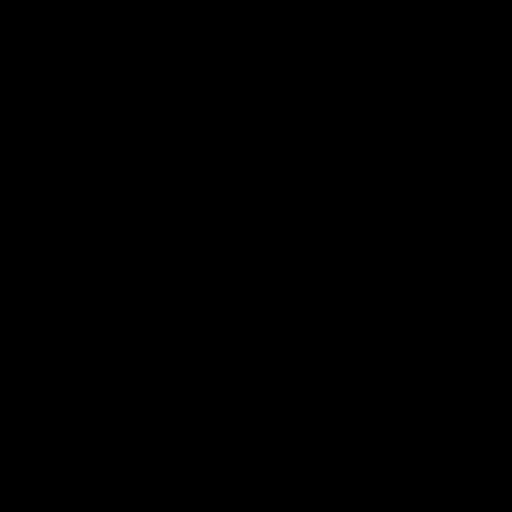

In [31]:
def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)


# Display results for validation image #10
i = 10

# Display input image
#display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.

# Deuxieme Model

In [14]:
x_train = []
from tensorflow.keras.preprocessing.image import load_img

for path in train_input_img_paths:
    im = cv2.imread(path)

    x_train += [im]

x_train = np.array(x_train)

NameError: name 'train_input_img_paths' is not defined

In [22]:
x_train.shape

(310, 512, 512, 3)

In [27]:
y_train = []
from tensorflow.keras.preprocessing.image import load_img

for path in train_target_img_paths:
    im = Image.open(path)

    y_train += [np.array(im).astype(np.float32)]

y_train = np.array(y_train)

In [ ]:
y_train.shape

In [24]:
#TODO 
#val_input_img_paths 
#val_target_img_paths

In [28]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# load your data
x_train, y_train,  = x_train, y_train #images_train, mask_train 
#x_val, y_val =  val_train, val_mask

# preprocess input
x_train = preprocess_input(x_train)
#x_val = preprocess_input(x_val)

# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet',  input_shape = (512,512,3))
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

In [1]:
# fit model
# if you use data generator use model.fit_generator(...) instead of model.fit(...)
# more about `fit_generator` here: https://keras.io/models/sequential/#fit_generator
model.fit(
   x=x_train,
   y=y_train,
   batch_size=2,
   epochs=1,
   #validation_data=(x_val, y_val),
)

NameError: name 'model' is not defined

In [2]:
val_preds = model.predict(x_train)

NameError: name 'model' is not defined